   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES   
0        10107               30      95.70                2  2871.00  \
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...   
0   2/24/2003 0:00  Shipped       1         2     2003  ...  \
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE   
0        897 Long Airport Avenue           NaN            NYC    NY  \
1             59 rue de l'Abbaye           NaN

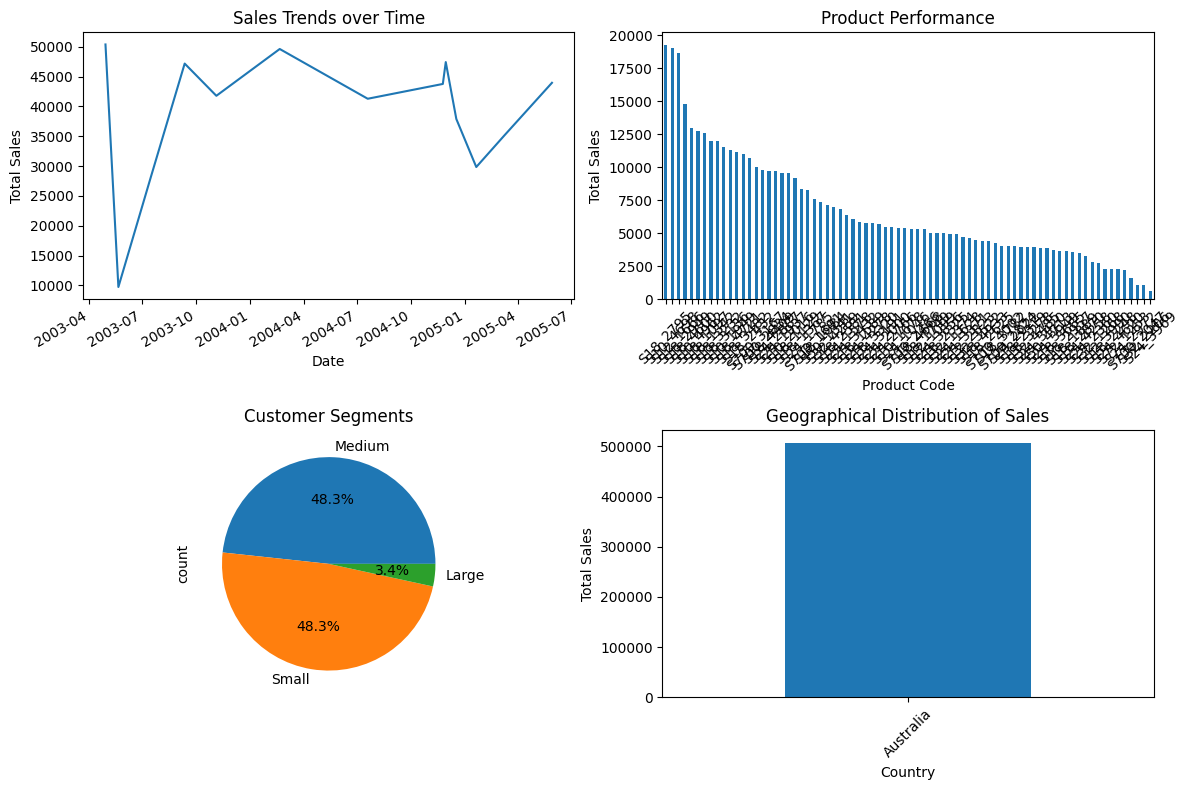


Total sales by product line:
 PRODUCTLINE
Classic Cars        161870.46
Motorcycles          75476.67
Planes               63772.09
Ships                 1089.36
Trucks and Buses     66020.96
Vintage Cars        138332.98
Name: SALES, dtype: float64

Product line with the highest sales: Classic Cars
Highest sales: 161870.46

Output file saved as: C:\Users\sunny\Downloads\sales_data_output.csv


In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\sunny\Downloads\sales_data.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

# Get an overview of the columns, data types, and non-null values
print('\nData types and non-null values:\n', df.info())

# Summary statistics of numerical columns
print('\nSummary statistics of numerical columns:\n', df.describe())

# Check for missing values
print('\nMissing values:\n', df.isnull().sum())

# Handle missing values
df.dropna(inplace=True)

# Remove duplicates, if any
df.drop_duplicates(inplace=True)

# Convert data types, if necessary
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Set the figure size for plots
plt.figure(figsize=(12, 8))

# Sales Trends over Time
plt.subplot(2, 2, 1)
df.groupby('ORDERDATE')['SALES'].sum().plot()
plt.title('Sales Trends over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Product Performance
plt.subplot(2, 2, 2)
product_performance = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False)
product_performance.plot(kind='bar')
plt.title('Product Performance')
plt.xlabel('Product Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Customer Segments
plt.subplot(2, 2, 3)
customer_segments = df['DEALSIZE'].value_counts()
customer_segments.plot(kind='pie', autopct='%1.1f%%')
plt.title('Customer Segments')

# Geographical Distribution of Sales
plt.subplot(2, 2, 4)
geographical_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
geographical_sales.plot(kind='bar')
plt.title('Geographical Distribution of Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Perform analysis tasks on the dataset
# Example: Calculate total sales by product line
total_sales_by_product_line = df.groupby('PRODUCTLINE')['SALES'].sum()

# Display the total sales by product line
print('\nTotal sales by product line:\n', total_sales_by_product_line)

# Identify the product line with the highest sales
product_line_with_highest_sales = total_sales_by_product_line.idxmax()
highest_sales = total_sales_by_product_line.max()

# Display the product line with the highest sales and its corresponding value
print('\nProduct line with the highest sales:', product_line_with_highest_sales)
print('Highest sales:', highest_sales)

# Recommendation: Focus on the "product_line_with_highest_sales" to maximize revenue.

# Save the output as a CSV file
output_path = r'C:\Users\sunny\Downloads\sales_data_output.csv'
df.to_csv(output_path, index=False)
print('\nOutput file saved as:', output_path)
